## L2SS-Py Shapefile Subsetting

Import Harmony Python library

In [1]:
import datetime as dt

from harmony import BBox, Client, Collection, Request
from harmony.config import Environment

Import libraries used to visualize l2ss-py result

In [2]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

import warnings
warnings.filterwarnings('ignore')

Create Harmony client. In this case, point the Harmony client at the `LOCAL` Harmony environment.

In [7]:
harmony_client = Client()

The example utilized in this demo uses a shapefile of the Gulf of Mexico. That shapefile ZIP file is in the local directory this notebook is running in.

In [8]:
shapefile_path = 'gulf_shapefile.zip' 
collection_id = 'C2075141605-POCLOUD'  # ASCATB-L2-Coastal

request = Request(
    collection=Collection(id=collection_id),
    shape=shapefile_path,
    granule_id=[
        'G2244750740-POCLOUD',
        'G2244133671-POCLOUD',
        'G2243066020-POCLOUD'
    ]
)

request.is_valid()

True

Wait for processing and then view the output

In [9]:
job_id = harmony_client.submit(request)

print(f'jobID = {job_id}')
harmony_client.wait_for_processing(job_id, show_progress=True)

jobID = 3af6c0ce-bbed-45b0-86ae-265a00182a6f


 [ Processing: 100% ] |###################################################| [|]


In [10]:
def display_wind_speed(nc_file_name):
    ds = xr.load_dataset(nc_file_name, engine='netcdf4')
    lats = ds.lat.values
    lons = ds.lon.values
    wind_speed_data = ds.wind_speed.values

    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()
    # Zoom in to ~ north america
    ax.set_extent([-170, -20, 0, 40])
    ax.contourf(lons, lats, wind_speed_data)
    plt.show()

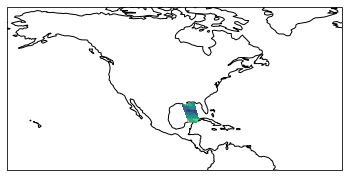

ascat_20220328_023300_metopb_49418_eps_o_coa_3202_ovw.l2_subsetted.nc4


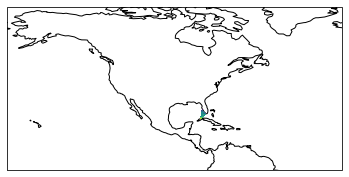

ascat_20220329_140000_metopb_49439_eps_o_coa_3202_ovw.l2_subsetted.nc4


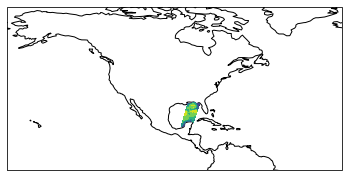

ascat_20220330_152100_metopb_49454_eps_o_coa_3202_ovw.l2_subsetted.nc4


In [11]:
for filename in [f.result() for f in harmony_client.download_all(job_id)]:
    display_wind_speed(filename)
    print(filename)
    